In [6]:
import cv2
import matplotlib.pyplot as plt

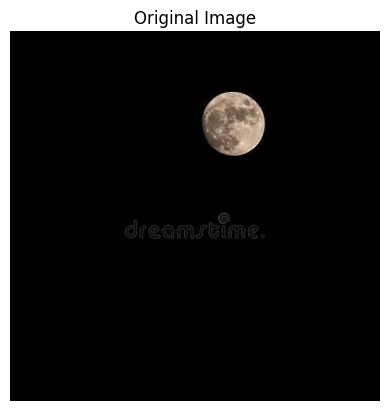

In [16]:
path="imgs/1.jpg"

img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

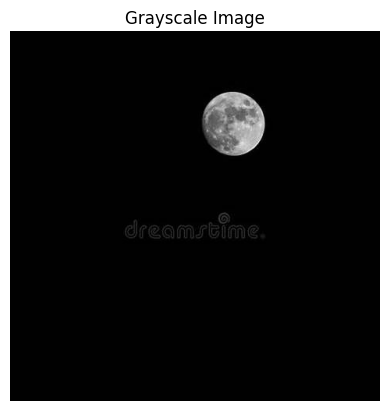

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

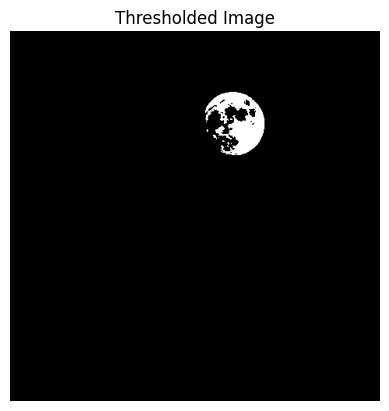

In [20]:
# Only take white pixels into account
ret,thresh = cv2.threshold(img_gray,127,255,0)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

# How to compute the center of the moon?

We need to compute the moments of the thresholded image. Moments are quantitative measures that capture the shape, orientation, and distribution of pixel intensities in an image. <br>
They are computed in this way for a grayscale: <br><br>
$$M_{pq}=\sum_{x} \sum_{y} x^p y^q I(x,y)$$ 
where $I(x,y)$ is the value of the pixel at x,y <br>
$M_{00}$ is the area of the picture and $\frac{M_{10}}{M_{00}}$, $\frac{M_{01}}{M_{00}}$ will give the centeroids of the picture

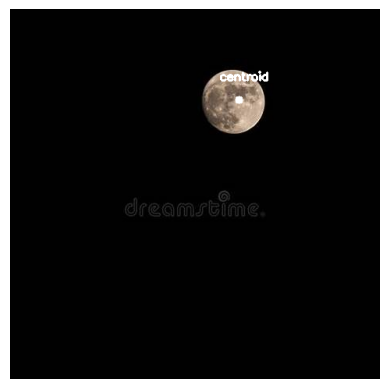

In [21]:
# Calculate the moments of the thresholded image
M = cv2.moments(thresh)

# Centeroids
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()